In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6


In [45]:
dataset = pd.read_csv('/Users/osman/Desktop/time series/Coal Futures Historical Data.csv')
#dataset['Date'] = pd.to_datetime(dataset['Date'], infer_datetime_format=True)
#indexedDataset = dataset.set_index(['Date'])
#dataset.describe()

In [32]:
dataset.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
"Nov 16, 2018",78.05,78.05,78.05,78.05,-,0.00%
"Nov 15, 2018",78.05,78.05,78.05,78.05,-,0.00%
"Nov 14, 2018",78.05,78.05,78.05,78.05,-,0.64%
"Nov 13, 2018",77.55,77.55,77.55,77.55,-,0.00%
"Nov 12, 2018",77.55,77.55,77.55,77.55,-,0.00%


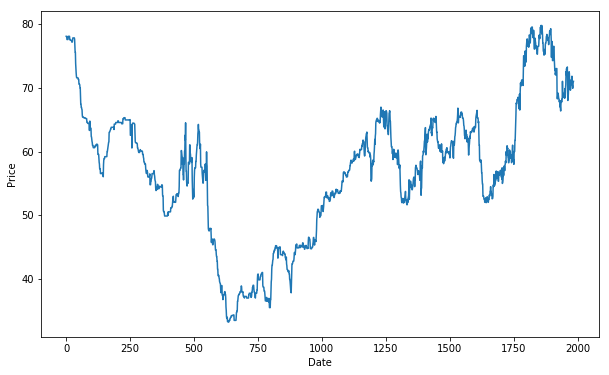

In [48]:
dataset['Price'].plot()
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [61]:
rolmean = dataset['Price'].rolling(window=12).mean()
rolstd = dataset['Price'].rolling(window=12).std()
print(rolmean, rolstd)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11      77.841667
12      77.841667
13      77.841667
14      77.800000
15      77.800000
16      77.791667
17      77.783333
18      77.775000
19      77.762500
20      77.708333
21      77.654167
22      77.579167
23      77.504167
24      77.429167
25      77.379167
26      77.400000
27      77.420833
28      77.450000
29      77.479167
          ...    
1955    69.308333
1956    69.558333
1957    69.933333
1958    70.195833
1959    70.520833
1960    70.925000
1961    71.104167
1962    71.075000
1963    70.962500
1964    71.004167
1965    71.004167
1966    71.066667
1967    71.066667
1968    71.087500
1969    70.900000
1970    70.700000
1971    70.454167
1972    70.150000
1973    70.083333
1974    70.350000
1975    70.570833
1976    70.708333
1977    70.787500
1978    70.833333
1979    70

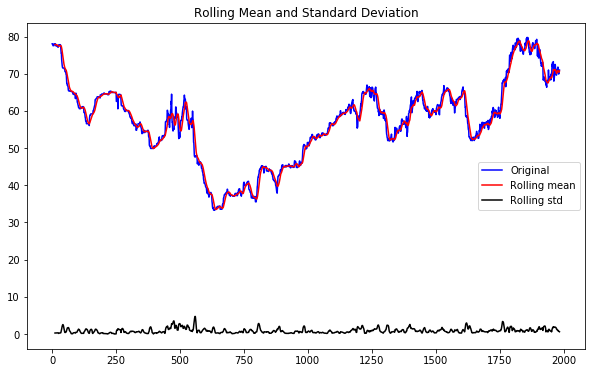

In [58]:
orig = plt.plot(dataset['Price'], color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling mean')
std = plt.plot(rolstd, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show()

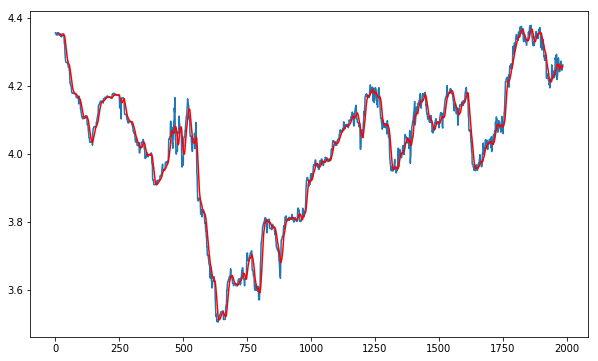

In [63]:
dataset_log = np.log(dataset['Price']) 
#plt.plot(dataset_log)

movingAverage = dataset_log.rolling(window=12).mean()
movingStd = dataset_log.rolling(window=12).std()
plt.plot(dataset_log)
plt.plot(movingAverage,color='red')

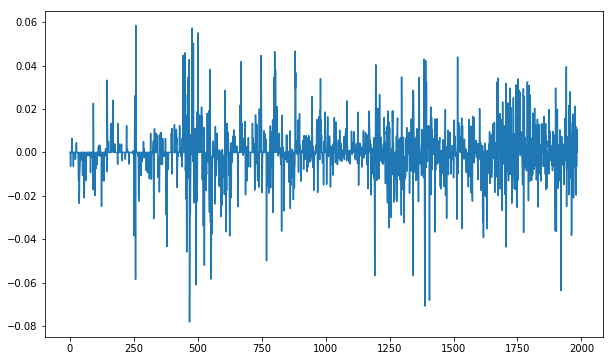

In [64]:
dataset_logshift = dataset_log - dataset_log.shift()
plt.plot(dataset_logshift)

C:\Users\osman\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\osman\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1984
Model:                 ARIMA(5, 1, 1)   Log Likelihood                6012.216
Method:                       css-mle   S.D. of innovations              0.012
Date:                Mon, 19 Nov 2018   AIC                         -12008.432
Time:                        12:54:29   BIC                         -11963.689
Sample:                             1   HQIC                        -11991.996
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.716e-05      0.000     -0.145      0.885      -0.001       0.001
ar.L1.D.y      0.0269      0.251      0.107      0.914      -0.464       0.518
ar.L2.D.y      0.0856      0.029      2.944      0.0

C:\Users\osman\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


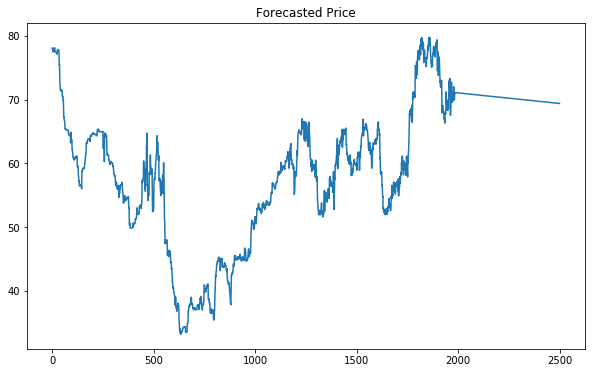

In [82]:
from statsmodels.tsa.arima_model import ARIMA

price_matrix = dataset_log.as_matrix()
model = ARIMA(price_matrix, order=(5,1,1))
results_AR = model.fit(disp=0)
print(results_AR.summary())
predictions = results_AR.predict(1, 2500, typ='levels')
predictionsadjusted = np.exp(predictions)
plt.plot(predictionsadjusted)
plt.title("Forecasted Price")
plt.show()

